## Introduction
Here, I will clean data from Financial Services Consumer Complaint Database which is publicly avalable in this link: https://catalog.data.gov/dataset/consumer-complaint-database#topic=consumer_navigation. As described in this webpage, it contains "data from the complaints received by the Consumer Financial Protection Bureau (CFPB) on financial products and services, including bank accounts, credit cards, credit reporting, debt collection, money transfers, mortgages, student loans, and other types of consumer credit. Data available about each complaint includes the name of the provider, type of complaint, date, zip code, and other information."


## Data cleaning
Here is the road map for what I will do to cleaning process.  
### Import the libraries to set up the envirenment and load the data

In [296]:
import pandas as pd
import numpy as np
import os
# Load the raw data using the read_csv object
df = pd.read_csv("/Users/hossein/Consumer_Complaints/Consumer_Complaints.csv")

/Users/hossein/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning:

Columns (5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.



### Investigate the data
Panda provides enough tools to get information about your raw data by just a brief line of code. Let's look at the top of our dataset by executing the following command:

In [297]:
df.head()


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,02/04/2019,Credit card or prepaid card,General-purpose credit card or charge card,Getting a credit card,Sent card you never applied for,NaN,Company believes it acted appropriately as aut...,First Federal Credit Control,FL,NaN,NaN,NaN,Web,02/04/2019,Closed with explanation,Yes,NaN,3141563
1,02/04/2019,Debt collection,Payday loan debt,False statements or representation,Attempted to collect wrong amount,NaN,NaN,"ONEMAIN FINANCIAL HOLDINGS, LLC.",MI,NaN,Older American,NaN,Web,02/04/2019,In progress,Yes,NaN,3141667
2,02/04/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"NCC Business Services, Inc.",TX,NaN,NaN,NaN,Web,02/04/2019,In progress,Yes,NaN,3142226
3,02/04/2019,Mortgage,Conventional home mortgage,Struggling to pay mortgage,NaN,NaN,NaN,"BAYVIEW LOAN SERVICING, LLC",CA,NaN,NaN,Other,Web,02/04/2019,In progress,Yes,NaN,3142610
4,02/04/2019,Debt collection,I do not know,Attempts to collect debt not owed,Debt was paid,NaN,NaN,"Diversified Consultants, Inc.",OH,45044,NaN,NaN,Web,02/04/2019,In progress,Yes,NaN,3141862


A quick look at this dataset,  we can see that in some of our columns, we have NaN values. I will get back to this but first get some information about the structure of our data bu executing _df.dtypes_ and _df.info()_. 

In [77]:
df.shape

(1210607, 18)

In [298]:
df.dtypes.to_frame(name='Type') # df.info()  is also return back data type plus other useful info. 

,Type
Date received,object
Product,object
Sub-product,object
Issue,object
Sub-issue,object
Consumer complaint narrative,object
Company public response,object
Company,object
State,object
ZIP code,object


Looking at the output of these two commands, we can see we have 18 columns (features) and over 1.2M rows. So this is a pretty huge dataset. Another important thing that we need to consider is understanding data types. A data type is essentially an inner construct that a programming language recruits to understand how to store and manipulate data. Here we can see that all of our features are objects (strings) but the Complaint ID being an integer type. later on, I will convert some of these data types to other ones as needed. 

Ok, now let's see how many missing (NAN) values we have in each colum. The following command provides this information for us. It sounds like we have considarable missing values in 9 columns. I will fill them mostly by a "Not given" str type in next section.  


In [299]:
df.isnull().sum().to_frame(name='missing counts')

,missing counts
Date received,0
Product,0
Sub-product,235166
Issue,0
Sub-issue,521887
Consumer complaint narrative,846404
Company public response,797586
Company,0
State,17098
ZIP code,104875


### Clean up the data
Let's start with "date columns". We have two colums that we need to convert themfrom strings to datetime objects. Pandas to_datetime command can easyly do this job for us: 

In [300]:
df["Date received"] = pd.to_datetime(df["Date received"])
df['Date sent to company'] = pd.to_datetime(df['Date sent to company'])


There are three columns in our dataset that can be considered as Boolean type.  The following three lines of commands will execute this conversion by recruiting Numpy's "where" module. The idea is to convert all "Yes" values  to True and everything else will be assigned to False (in case of the third line, "Consent not provided" to False and the rest to True ). 

The basic idea is to use the np.where() function to convert all “Y” values to True and everything else assigned False




In [307]:
df["Timely response?"] = np.where(df["Timely response?"] == "Yes", True, False)
df["Consumer disputed?"] = np.where(df["Consumer disputed?"] == "Yes", True, False)
df["Consumer consent provided?"] = np.where(df["Consumer consent provided?"] == "Consent not provided", False, True)

The "ZIP code" colum contains lots of sings and also an exta letter attached to some of Zip codes in this colum. This function written below will strip all these out from the column.  

In [327]:
def replace_ZIP_code_XX_USMOI(x):
    '''
    Replace XX in Zip code to 00
    '''
    try: 
        return x.replace('XX', '00').replace('(','').replace('"','').replace('-','').replace('$','').replace('.','').replace('!','').replace('+','').replace('*','').replace('`','').replace('/','').replace('UNITED STATES MINOR OUTLYING ISLANDS','USMOI')
    except AttributeError:
        return np.NaN

df['ZIP code'] = df['ZIP code'].map(replace_ZIP_code_XX_USMOI)
df["State"] = df["State"].map(replace_ZIP_code_XX_USMOI)


Now Let's fill in all the missing values with appropriate values. 
In "ZIP code" case, I will fill them in with "00000" and convert its type to integer. For the other cases, I will fill them in with "Not given".

In [328]:
df['ZIP code'] = df['ZIP code'].fillna("00000").astype(int)
df['State'] = df['State'].fillna("Not given")
df['Product'] = df['Product'].fillna("Not given")
df['Sub-product'] = df['Sub-product'].fillna("Not given")
df['Issue'] = df['Issue'].fillna("Not given")
df['Sub-issue'] = df['Sub-issue'].fillna("Not given")
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].fillna("Not given")
df['Company public response'] = df['Company public response'].fillna("Not given")
df['Company response to consumer'] = df['Company response to consumer'].fillna("Not given")
df['Tags'] = df['Tags'].fillna("Not given")

In [313]:
#lets see How our data types look like. 
df.dtypes.to_frame(name='Type')

,Type
Date received,datetime64[ns]
Product,object
Sub-product,object
Issue,object
Sub-issue,object
Consumer complaint narrative,object
Company public response,object
Company,object
State,object
ZIP code,int64


Ok, now I will just save the cleaned data set into the current working directory (cwd) by the following command line. 

In [ ]:
df.to_csv("Customer_Complaints_cleaned.csv", sep='\t', encoding='utf-8') # cwd = os.getcwd()

## Data vizualization

In [2]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
import pylab as pl
from pylab import rcParams
from matplotlib import cm
import plotly.graph_objs as go
import plotly.offline as py
import os
import plotly.tools as tls
import plotly.figure_factory as ff
import matplotlib.ticker as mtick

NameError: name 'sb' is not defined

In [ ]:
%matplotlib inline
#rcParams['figure.figsize'] = 28, 4
sb.set_style('whitegrid')

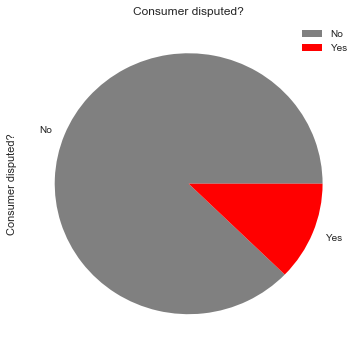

In [320]:
Disputed_cunsumer_rate = (df['Consumer disputed?'].value_counts()*100.0 /len(df)).plot(kind='pie',\
        labels = ['No', 'Yes'], figsize = (6,6) , colors = ['grey','red'])

Disputed_cunsumer_rate.set_title('Consumer disputed?')
Disputed_cunsumer_rate.legend(labels=['No','Yes']);

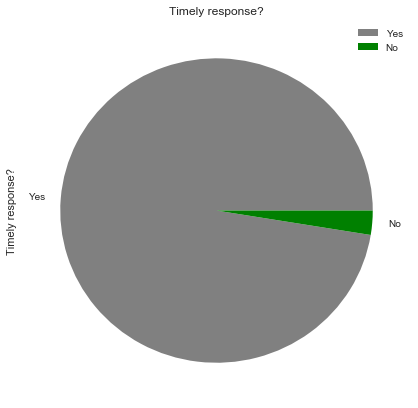

In [323]:
Timely_response_rate = (df['Timely response?'].value_counts()*100.0 /len(df)).plot(kind='pie',\
        labels = ['Yes', 'No'], figsize = (7,7) , colors = ['grey','green'])

Timely_response_rate.set_title('Timely response?')
Timely_response_rate.legend(labels=['Yes','No']);

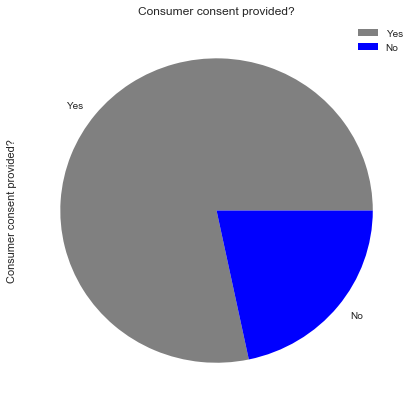

In [324]:
Consumer_consent_provided_rate = (df['Consumer consent provided?'].value_counts()*100.0 /len(df)).plot(kind='pie',\
        labels = ['Yes', 'No'], figsize = (7,7) , colors = ['grey','blue'])

Consumer_consent_provided_rate.set_title('Consumer consent provided?')
Consumer_consent_provided_rate.legend(labels=['Yes','No']);

/Users/hossein/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



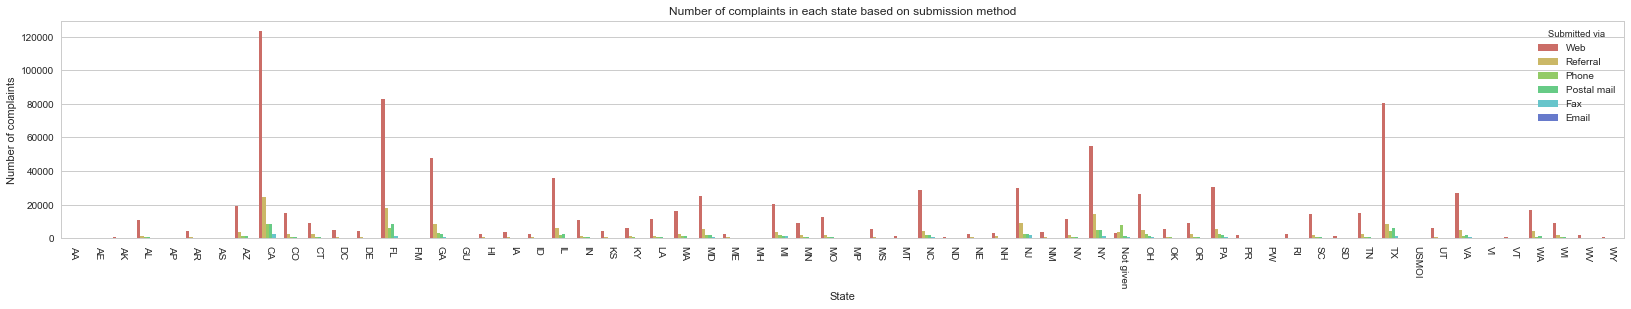

In [329]:
rcParams['figure.figsize'] = 28, 4
gb = df.groupby("State")["Submitted via"].value_counts().to_frame().rename({"Submitted via": "Number of complaints"}, axis = 1).reset_index()
sns.barplot(x = "State", y = "Number of complaints", data = gb, hue = "Submitted via", palette = sns.color_palette("hls", 8)).set_title("Number of complaints in each state based on submission method");
plt.xticks(rotation=-90);




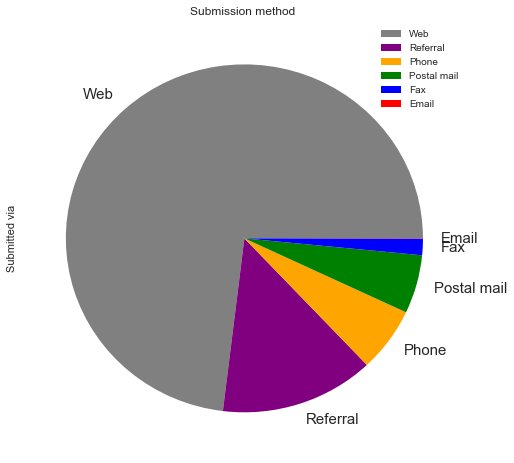

In [330]:
submission = (df['Submitted via'].value_counts()*100.0 /len(df)).plot(kind='pie',\
        figsize = (8,8) , colors = ['grey','purple', 'orange', 'green', 'blue', 'red'], fontsize = 15)

submission.set_title('Submission method ')
submission.legend(labels=['Web', 'Referral', 'Phone', 'Postal mail', 'Fax', 'Email']);

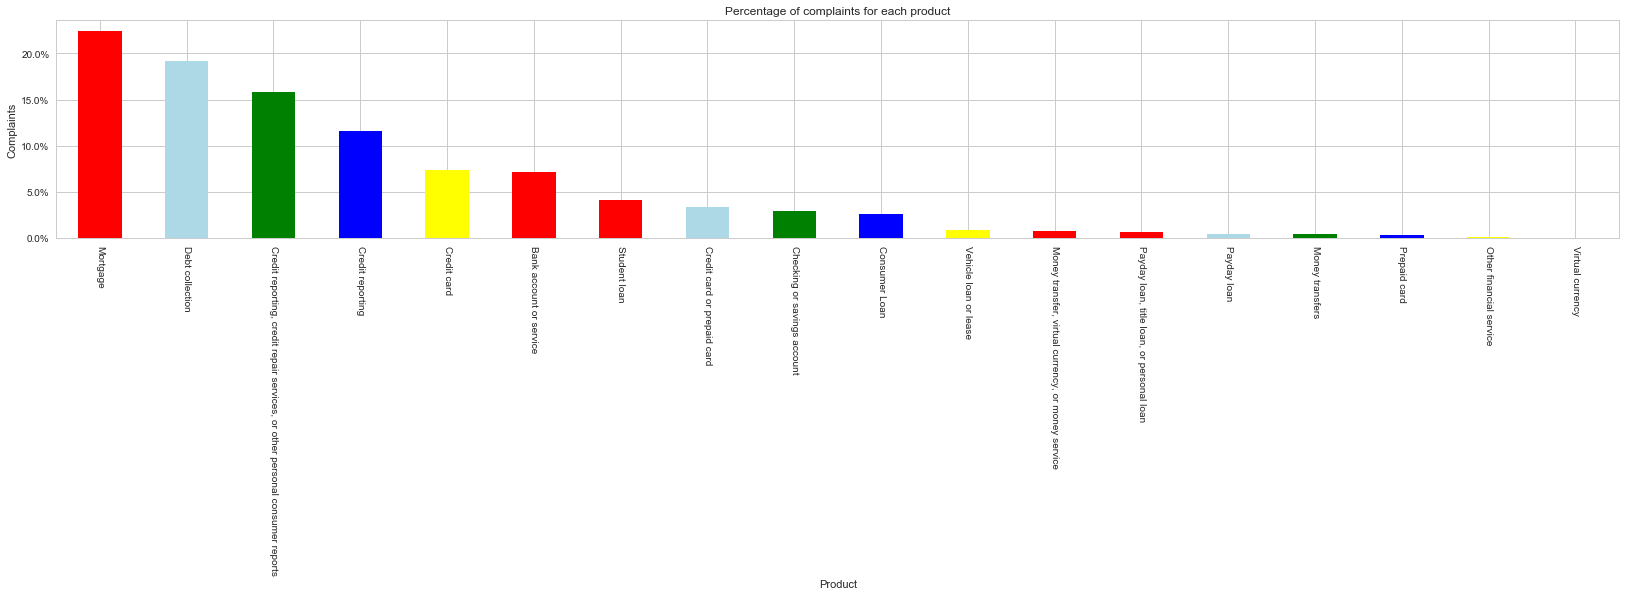

In [331]:
product_info = (df['Product'].value_counts()*100.0 /len(df2)).plot(kind='bar', stacked = True,\
                                                rot = 0, color = ['red','lightblue','green', 'blue', 'yellow'])
  
product_info.yaxis.set_major_formatter(mtick.PercentFormatter())
product_info.set_ylabel('Complaints')
product_info.set_xlabel('Product')
product_info.set_title('Percentage of complaints for each product');
plt.xticks(rotation=-90);

In [333]:
df["Company public response"] = np.where(df["Company public response"] == "Not given", False, True)

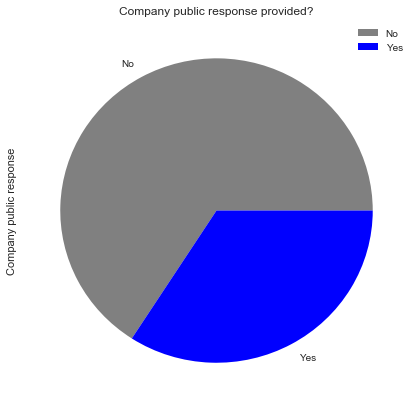

In [334]:

Company_public_response_rate = (df['Company public response'].value_counts()*100.0 /len(df2)).plot(kind='pie',\
        labels = ['No', 'Yes'], figsize = (7,7) , colors = ['grey','blue'])

Company_public_response_rate.set_title('Company public response provided?')
Company_public_response_rate.legend(labels=['No','Yes']);


In [335]:
date_delay = (df['Date sent to company']- df['Date received']).astype('timedelta64[D]')

(0, 40)

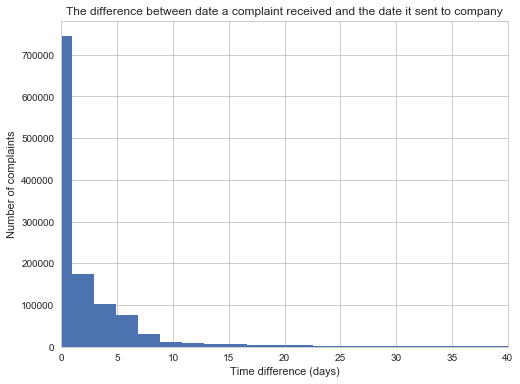

In [337]:
rcParams['figure.figsize'] = 8, 6
plt.hist(date_delay, normed=False, bins=1000)
plt.ylabel('Number of complaints');
plt.xlabel('Time difference (days)');
plt.title('The difference between date a complaint received and the date it sent to company')
plt.xlim((0, 40))
